# Kater's Pendulum  
#### Date: 2 October 2024

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

import scienceplots 
plt.style.use(['science','notebook', 'grid'])

from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)

In [12]:
T_u = np.array([2.01701, 2.02042, 2.02415, 2.0277, 2.03199, 2.03566, 2.0408, 2.04423, 2.04762, 2.05176])
T_d = np.array([2.01522, 2.01778, 2.02086, 2.02364, 2.02644, 2.02968, 2.03359, 2.03634, 2.03900, 2.04259])

d_S = np.array([4.99, 6.00, 7.00, 8.00, 9.10, 10.01, 11.00, 12.15, 12.90, 13.9])

deltaT = np.array([-0.00179, -0.00264, -0.0033, -0.0040, -0.00555, -0.0060, -0.0072, -0.00789, -0.0086, -0.00917])

# Error bars
xerr = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1])
yerr_T_u = np.array([[0.00005, 0.00006, 0.00005, 0.0001, 0.00006, 0.00006, 0.0001, 0.00004, 0.00009, 0.00005]])
yerr_T_d = np.array([0.00008, 0.00006, 0.00008, 0.00008, 0.00007, 0.00008, 0.00006, 0.00004, 0.00007, 0.00006])

yerr_delta_T = np.array([0.00010, 0.00008, 0.0001, 0.0001, 0.00009, 0.0001, 0.0001, 0.00006, 0.0001, 0.00008]
)

#### T vs $d_S$ graphs

In [15]:
x_data = np.linspace(4.99, 14, 100)

def polynomial(x, a, b, c):
    return a*x**2 + b*x + c

params, params_covariance = optimize.curve_fit(polynomial, d_S, T_d)
print(params, '\n')

fitline = []
for i in range(len(x_data)):
    fitline.append(polynomial(x_data[i], params[0], params[1], params[2]))

[4.45305119e-05 2.23421715e-03 2.00289083e+00] 



In [17]:
x_data = np.linspace(4.99, 14, 100)

def polynomial(x, a, b, c):
    return a*x**2 + b*x + c

params1, params_covariance1 = optimize.curve_fit(polynomial, d_S, T_u)
print(params1, '\n')

fitline2 = []
for i in range(len(x_data)):
    fitline2.append(polynomial(x_data[i], params1[0], params1[1], params1[2]))

[3.84854606e-05 3.20896426e-03 1.99984139e+00] 



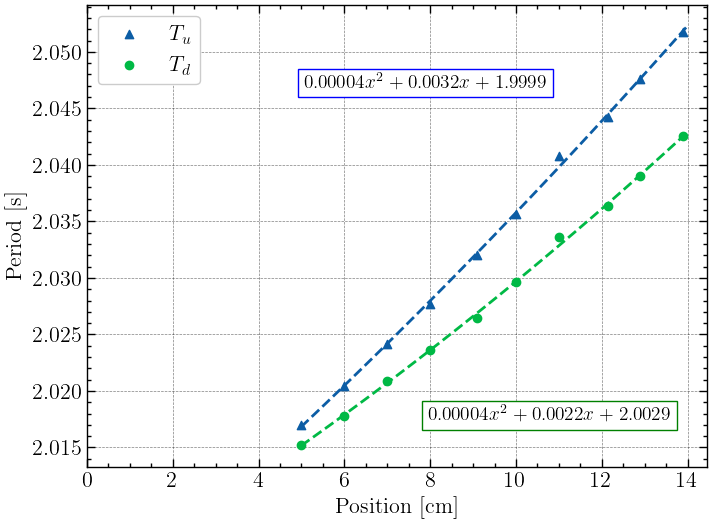

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

ax.plot(x_data, fitline2, '--')
ax.scatter(d_S, T_u, marker = '^', label = '$T_u$')


ax.plot(x_data, fitline, '--')
ax.scatter(d_S, T_d, label = '$T_d$')


ax.set_xlabel('Position [cm]')
ax.set_ylabel('Period [s]')
ax.text(0.35, 0.82, '$0.00004x^2+0.0032x+1.9999$', transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='blue'))
ax.text(0.550, 0.1, '$0.00004x^2+0.0022x+2.0029$', transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='green'))
plt.xlim(0)
ax.legend()
plt.savefig("fig1.png")
plt.show()

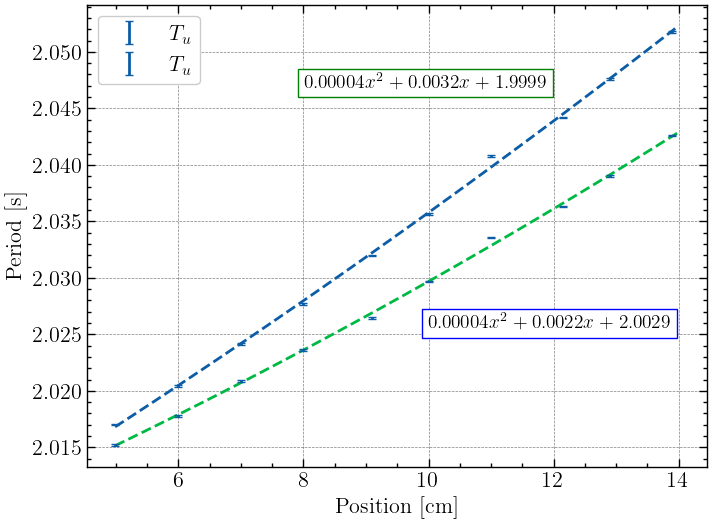

In [130]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(x_data, fitline2, '--')
# ax.scatter(d_S, T_u, marker = '^', label = '$T_u$')
ax.errorbar(d_S, T_u, yerr = yerr_T_u, fmt = 'none', label='$T_u$', capsize=3)



ax.plot(x_data, fitline, '--')
# ax.scatter(d_S, T_d, label = '$T_d$')
ax.errorbar(d_S, T_d, yerr = yerr_T_d, fmt = 'none', label='$T_u$', capsize=3)


ax.set_xlabel('Position [cm]')
ax.set_ylabel('Period [s]')
ax.text(0.35, 0.82, '$0.00004x^2+0.0032x+1.9999$', transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='blue'))
ax.text(0.550, 0.3, '$0.00004x^2+0.0022x+2.0029$', transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='green'))
ax.legend()
# plt.savefig("fig1.png")
plt.show()

#### $\Delta T$ vs $d_S$ graph

In [19]:
x_data = np.linspace(4.99, 14, 100)

def polynomial(x, a, b, c):
    return a*x**2 + b*x + c

params2, params_covariance2 = optimize.curve_fit(polynomial, d_S, deltaT)
print(params2, '\n')

fitline3 = []
for i in range(len(x_data)):
    fitline3.append(polynomial(x_data[i], params2[0], params2[1], params2[2]))

[ 5.70981670e-06 -9.68316460e-04  3.02734382e-03] 



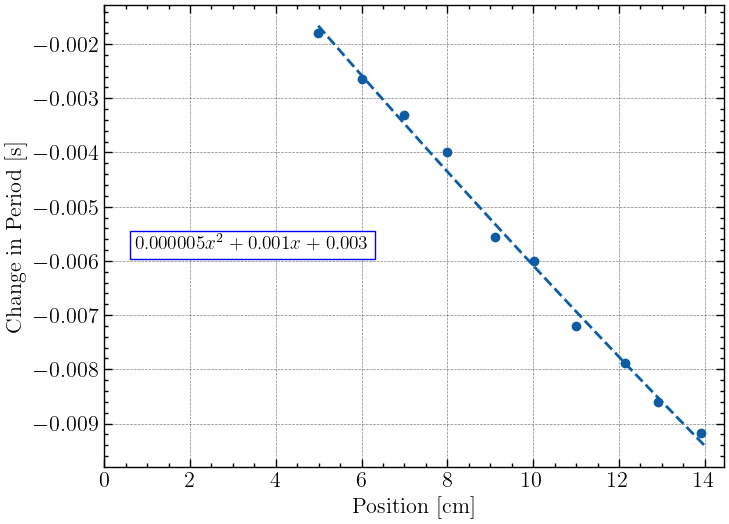

In [126]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.plot(x_data, fitline3, '--')
ax.scatter(d_S, deltaT)
ax.set_xlabel('Position [cm]')
ax.set_ylabel('Change in Period [s]')
ax.text(0.05, 0.47, '$0.000005x^2+0.001x+0.003$', transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='blue'))
plt.xlim(0)
plt.savefig('fig2.png')
plt.show()

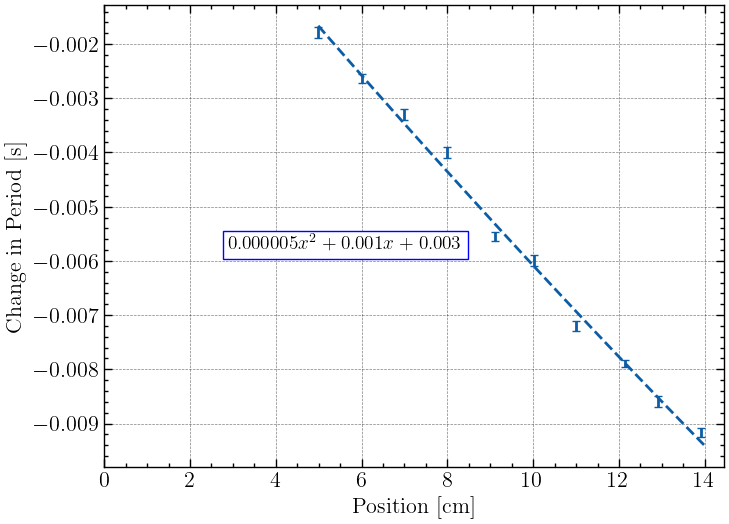

In [141]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.plot(x_data, fitline3, '--')
# ax.scatter(d_S, deltaT)
ax.errorbar(d_S, deltaT, yerr = yerr_delta_T, fmt = 'none', label='$T_u$', capsize=3)
ax.set_xlabel('Position [cm]')
ax.set_ylabel('Change in Period [s]')
ax.text(0.2, 0.47, '$0.000005x^2+0.001x+0.003$', transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='blue'))
plt.xlim(0)
plt.savefig('fig2.png')
plt.show()